# Imports

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modules.Utils.utils import loadFromDB

# Data loading

In [2]:
SYMBOL= 'BTC'
df = loadFromDB(SYMBOL,'1d')#.iloc[-10000:-9000]
df.head()

,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2020-06-01,9448.27,10380.00,9421.67,10200.77,76649.126960,1590969600
2020-06-02,10202.71,10228.99,9266.00,9518.04,108970.773151,1591056000
2020-06-03,9518.02,9690.00,9365.21,9666.24,46252.644939,1591142400
2020-06-04,9666.32,9881.63,9450.00,9789.06,57456.100969,1591228800
2020-06-05,9788.14,9854.75,9581.00,9621.16,47788.050050,1591315200


# Method 1

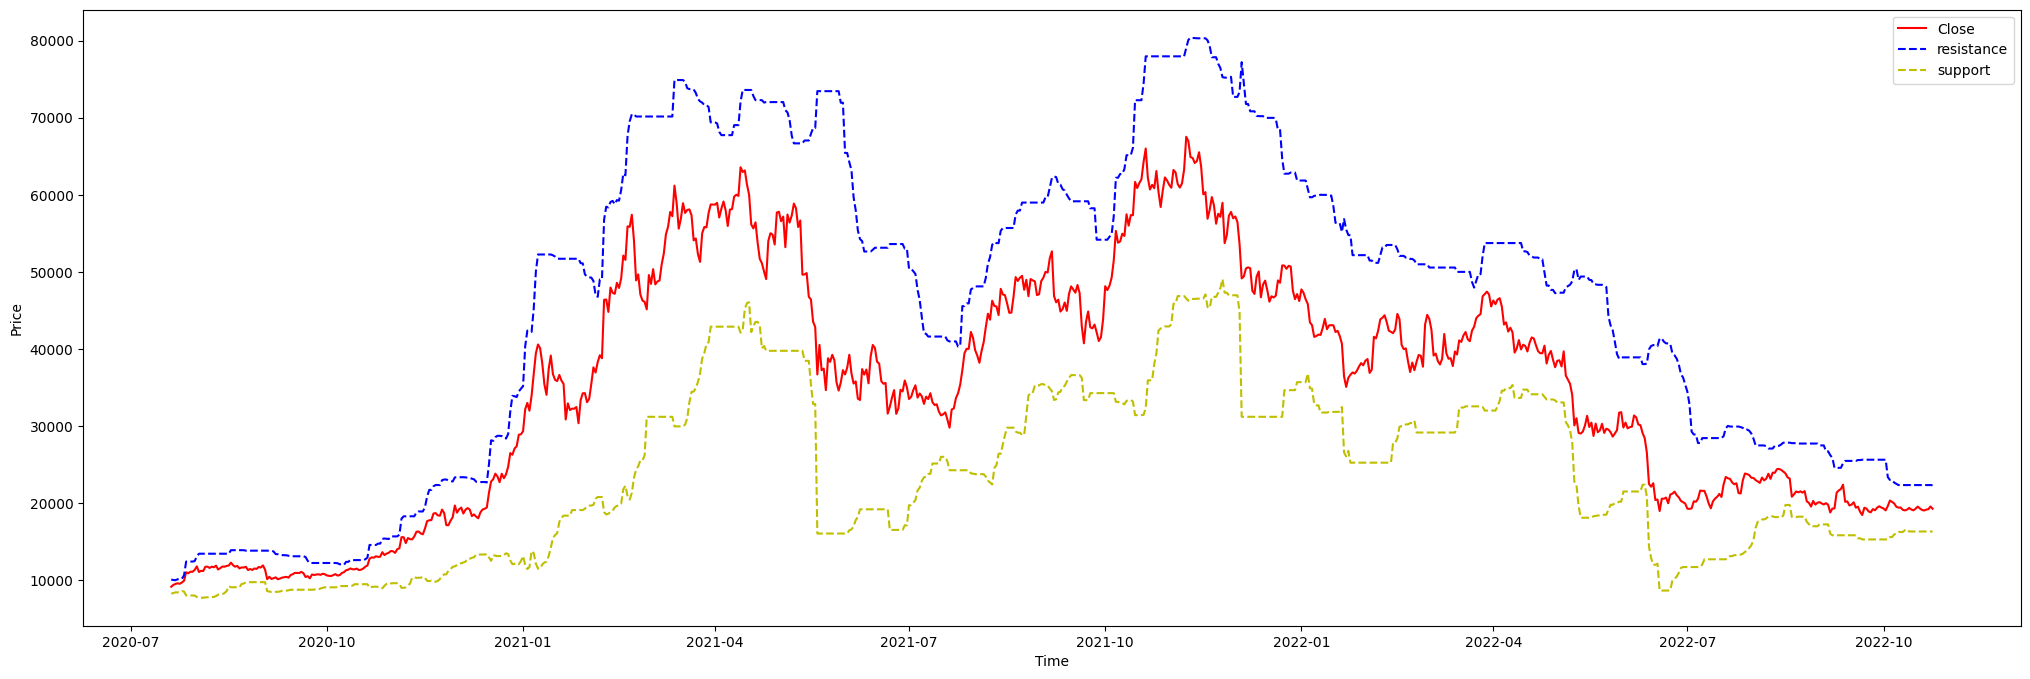

In [3]:
def support_resitance(df:pd.DataFrame, lookback:int=50, secondary_lookback:int=20, low_coef:float=0.1, high_coef:float=0.5)->pd.DataFrame:
    df_cop = df.copy()
    df_cop['range'] = df_cop['High'].rolling(lookback).max()-df_cop['Low'].rolling(lookback).min()

    # df['support'] = df_cop['Low'] + (df_cop['range'] * low_coef)
    # df['resistance'] = df_cop['High'] - (df_cop['range'] * high_coef)
    df["support"] = df_cop['Low'].rolling(window=secondary_lookback).min() - df_cop["range"] *low_coef
    
    # Calculate the resistance level
    df["resistance"] = df_cop['High'].rolling(window=secondary_lookback).max()+ df_cop["range"] * high_coef
    
    
    return df.dropna()

co = 0.40

df = support_resitance(df,low_coef=co,high_coef=co)

fig, ax = plt.subplots(figsize=(25,8))

ax.plot(df['Close'], 'r-', label='Close')
ax.plot(df['resistance'], 'b--', label='resistance')
ax.plot(df['support'], 'y--', label='support')

ax.set_xlabel('Time')
ax.set_ylabel('Price')

ax.legend(loc='best')

# Market profile